The tutorial starts by importing the relevant libraries.

In [5]:
import numpy as np
import sep
import astropy
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

Since the tutorial uses fitsio, it uses the function fitsio.read to open the final. Instead, I used fits.getdata, which gets the data of an HDU.

In [7]:
data = fits.getdata("image.fits")

print(data)

[[7010.5156 6878.9927 6963.752  ... 6905.297  6782.542  6876.07  ]
 [6990.0566 6759.16   6855.6104 ... 6770.8516 6840.997  6744.547 ]
 [6919.911  6855.6104 6864.379  ... 6800.0786 6881.915  6677.3237]
 ...
 [6773.774  6770.8516 6791.3105 ... 6849.765  6911.1426 6817.615 ]
 [6776.697  6899.4517 6776.697  ... 6855.6104 6864.379  6823.4604]
 [6846.843  6928.679  6873.1475 ... 6767.9287 6849.765  6767.9287]]


The tutorial then plots the image using matplotlib.

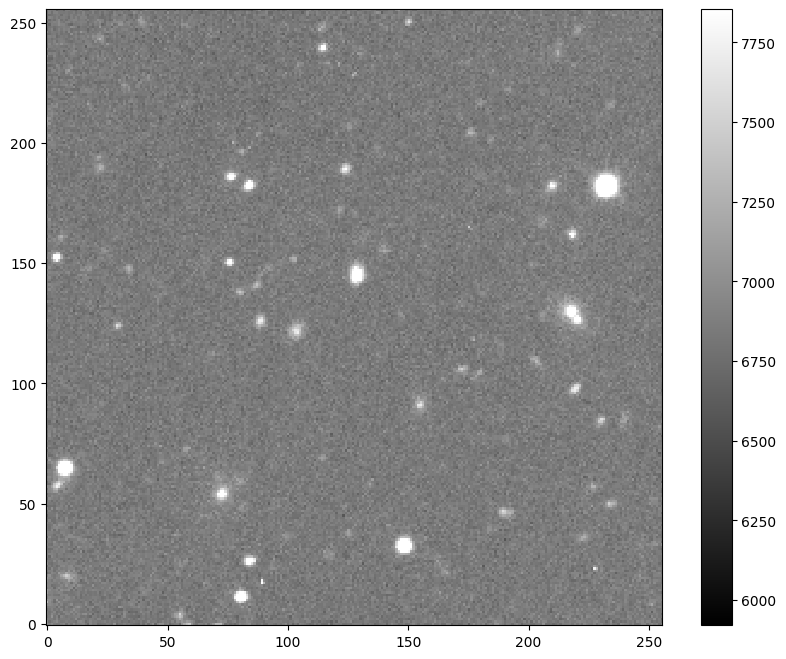

In [8]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('astr19final_1.png')

This image has visible background noise. So, the tutorial seperates and plots the background so that we will be able to remove it from the image, making it easier for sep to analyze the objects.

In [9]:
bkg = sep.Background(data)

In [10]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [11]:
bkg_image = bkg.back()

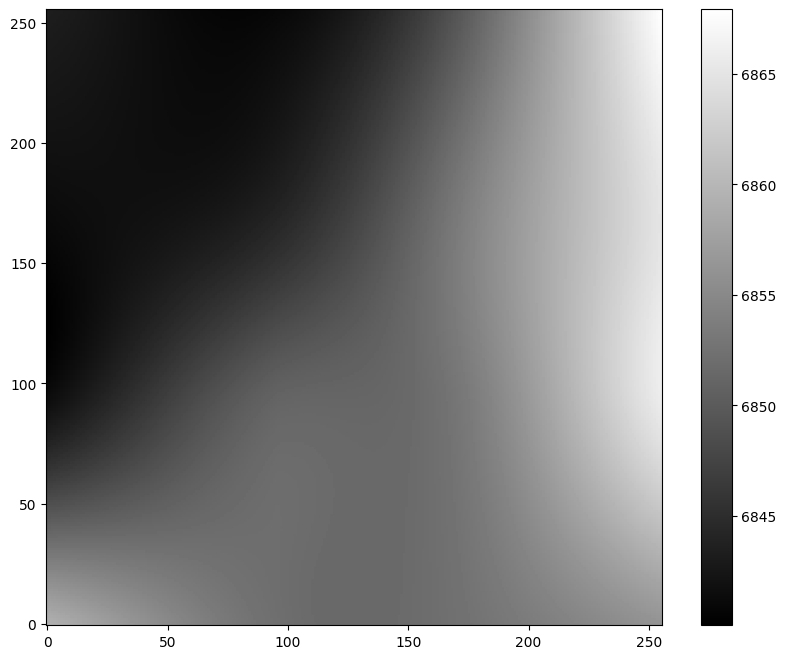

In [12]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('astr19final_2.png')

This image shows the background.

In [13]:
bkg_rms = bkg.rms()

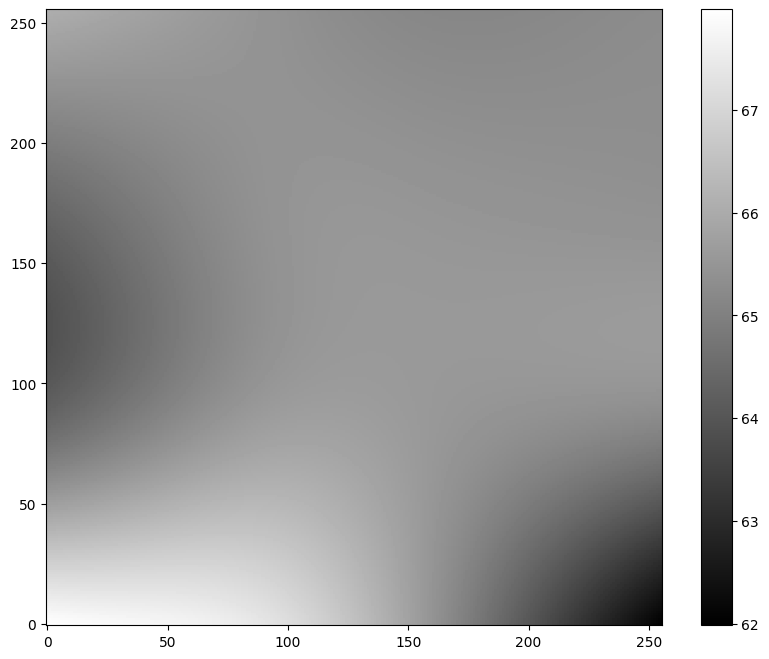

In [14]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('astr19final_3.png')

This image shows the background noise.

Next the tutorial subtracts the background model from the data.

In [15]:
data_sub = data - bkg

The tutorial then uses sep to run object detection on the background-subtracted data.

In [16]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [17]:
len(objects)

69

69 objects are identified.

This following cell plots red ellipses over the identified objects in order to make them appear more clear to the viewer.

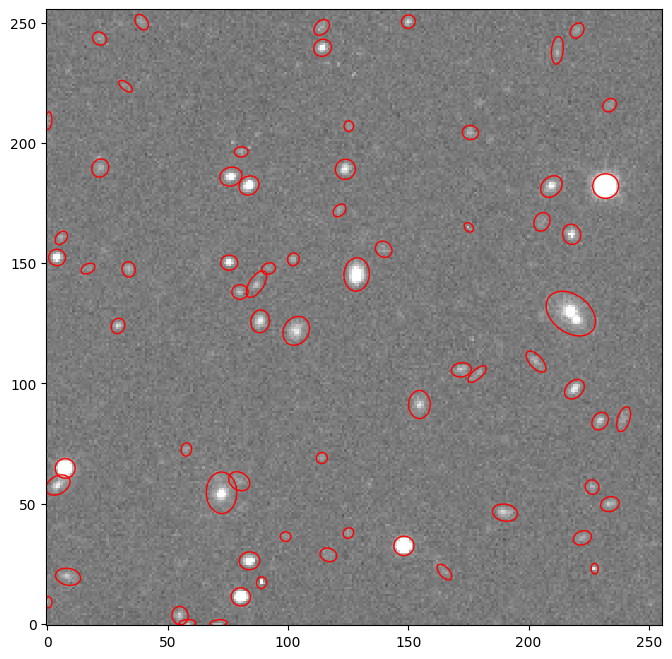

In [18]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('astr19final_4.png')

In [19]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

The tutorial performs simple aperture photometry, which is the measurement of light which falls inside a particular aperture. In this case, the apertures are the ellipses that we placed over the previous image.

In [20]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [21]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
